# Part 2: "Flat" Model  - Logistic Regression with RoBERTa Encodings and PCA

In [1]:
import pandas as pd
from sklearn.linear_model import LogisticRegression

In [2]:
ROOT_DATA_DIR = "/data"

In [3]:
papers_df = pd.read_parquet(ROOT_DATA_DIR + "/ogb-labeled-papers.parquet", engine='fastparquet')
papers_df

,paper_encoding_0,paper_encoding_1,paper_encoding_2,paper_encoding_3,paper_encoding_4,paper_encoding_5,paper_encoding_6,paper_encoding_7,paper_encoding_8,paper_encoding_9,...,paper_encoding_761,paper_encoding_762,paper_encoding_763,paper_encoding_764,paper_encoding_765,paper_encoding_766,paper_encoding_767,split_segment,paper_subject,paper_year
index,,,,,,,,,,,,,,,,,,,,,
0,0.438477,0.211060,0.393311,0.055969,-0.078003,-0.017807,0.553223,-0.319824,0.394043,0.502930,...,-0.052490,1.092773,0.157227,-1.467773,-1.590820,0.328613,0.332275,TRAIN,17.0,2014
1,0.468994,-0.202637,0.023331,0.535645,0.496582,0.024368,0.239990,0.539551,0.460449,0.078491,...,-0.132812,1.125977,0.368164,-0.191406,-0.378418,0.031616,-0.311523,TRAIN,29.0,2014
2,0.047485,-0.398682,-0.420410,0.882324,-0.114685,0.607910,0.151001,0.124695,-0.012108,-0.005211,...,-0.130127,-0.121155,0.790527,-0.147827,-0.451904,0.516602,-0.135986,TRAIN,38.0,2015
3,-0.395508,-0.464355,-0.336670,-0.156616,-0.396240,-0.449951,-0.033630,0.393066,0.552246,-0.076782,...,0.149780,1.133789,0.386230,0.066162,0.760742,0.355469,-0.658691,TRAIN,5.0,2005
4,0.103210,-0.125122,0.039490,0.651855,0.279053,0.020828,0.325439,-0.004528,0.264404,0.178101,...,0.056824,0.499023,0.038788,0.906250,-0.623047,-0.119080,0.394043,TRAIN,1.0,2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138944,-0.254883,-0.069885,-0.821289,1.201172,-0.639160,-0.368164,0.802246,-0.076355,0.324219,0.030365,...,0.553223,0.697754,0.369629,1.799805,-0.534180,-0.112244,-0.230713,VALIDATE,51.0,2019
138945,0.667480,-0.046448,0.194214,0.251953,0.003784,0.495361,0.756348,-0.065125,-0.071777,0.123657,...,-0.436279,1.187500,0.360596,-1.391602,-0.752930,-0.068970,0.195923,VALIDATE,12.0,2019
138946,0.660645,-0.515137,-0.776367,0.222412,-1.073242,0.049652,0.335205,0.281982,1.385742,0.360840,...,-0.331787,-0.043549,0.609863,0.025223,0.232422,0.211304,0.060333,VALIDATE,18.0,2019


## Data Split and Subject Label Stats

In [4]:
papers_df[['split_segment', 'paper_encoding_0']].groupby('split_segment').count()

,paper_encoding_0
split_segment,
TRAIN,1112392
VALIDATE,138949


In [5]:
papers_df[['paper_subject', 'paper_encoding_0']].groupby('paper_subject').count()

,paper_encoding_0
paper_subject,
0.0,28041
1.0,2856
2.0,3907
3.0,1530
4.0,1910
...,...
148.0,865
149.0,815
150.0,837


## Logistic Regression Using Entire 768 Dimensional Encoding


As a first pass we will try to fit this model with simple logistic regression using just the 768 dimensional RoBERTa encoding vectors as features. 

__Note: this model fitting step can take a while (several hours) to complete__

We will get convergence warnings when running the below model model.  I tried various different parameters to try and avoid this in sklearn but could not seem to do so. In a more rigorous setting I would recommend looking deeper into tuning parameters, different model types, different machine learning libraries/frameworks, etc. But for purposes of this demo we are just trying to get an initial rough benchmark. In the following sections we will apply a very simple solution of dimensionality reduction with Principal Components Analysis (PCA) to see the effect on results. 

In [6]:
papers_df = papers_df.astype({'paper_subject':'int32'})

In [7]:
X = papers_df[['paper_encoding_' + str(x) for x in range(768)]]
y = papers_df.paper_subject

In [8]:
X_train = X[papers_df.split_segment == "TRAIN"]
X_validate = X[papers_df.split_segment == "VALIDATE"]
y_train = y[papers_df.split_segment == "TRAIN"]
y_validate = y[papers_df.split_segment == "VALIDATE"]

In [9]:
model = LogisticRegression(multi_class='ovr', solver='saga', n_jobs=60, max_iter=200)

In [10]:
#Note: This can take a while (several hours)
model.fit(X_train, y_train)

/home/ubuntu/.conda/envs/graph2/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/ubuntu/.conda/envs/graph2/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/ubuntu/.conda/envs/graph2/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/ubuntu/.conda/envs/graph2/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/ubuntu/.conda/envs/graph2/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/ubuntu/.conda/envs/

LogisticRegression(max_iter=200, multi_class='ovr', n_jobs=60, solver='saga')

In [11]:
print('Accuracy of logistic regression classifier on VALIDATE set: {:.2f}'\
      .format(model.score(X_validate, y_validate)))

Accuracy of logistic regression classifier on VALIDATE set: 0.49


## Reducing Dimensionality with Principal Components Analysis (PCA)

In [12]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(X_train)

PCA()

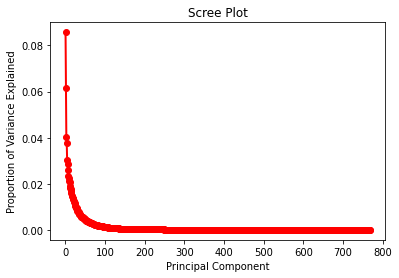

In [13]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'ro-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained')
plt.show()

Note that almost 93% of the variance is explained by the first 128 principal components

In [14]:
sum(pca.explained_variance_ratio_[:128])

0.9270989465518304

## Logistic Regression with 128 Principal Components

In [15]:
pca128 = PCA(n_components=128)
pca128.fit(X_train)
X_train_reduced = pca128.transform(X_train)
X_train_reduced

array([[-6.19892061e-01,  7.57744837e+00,  2.38994151e-01, ...,
         1.45125136e-01,  4.76339161e-01, -3.43906790e-01],
       [ 1.02952302e+00,  4.56361294e+00,  1.81073594e+00, ...,
        -3.10825527e-01, -1.21716559e-01, -1.96754932e-03],
       [ 1.57442674e-01,  4.48937798e+00, -2.28051734e+00, ...,
         1.97405860e-01,  4.04985249e-01, -6.72422767e-01],
       ...,
       [-7.67455101e+00, -1.38447428e+00,  3.48542595e+00, ...,
        -1.10648334e-01, -3.42456937e-01, -4.07753110e-01],
       [-7.29859233e-01, -1.26016960e-02,  1.33440959e+00, ...,
        -3.93246353e-01, -2.03127354e-01, -8.12449753e-02],
       [ 2.64888406e+00,  2.00736737e+00, -2.70441365e+00, ...,
         1.83935657e-01, -3.53981048e-01, -3.53198677e-01]], dtype=float32)

In [16]:
model_128 = LogisticRegression(multi_class='ovr', solver='saga', n_jobs=60)

In [17]:
model_128.fit(X_train_reduced, y_train)

LogisticRegression(multi_class='ovr', n_jobs=60, solver='saga')

In [18]:
X_validate_reduced = pca128.transform(X_validate)

In [21]:
print('Accuracy of logistic regression classifier on VALIDATE set: {:.2f}'\
      .format(model_128.score(X_validate_reduced, y_validate)))

Accuracy of logistic regression classifier on VALIDATE set: 0.43


__Accuracy seems to go down, though we seem to have avoided convergence warnings__

### Save PCA Object
We will use this in part 3 for Neo4j import.

In [22]:
from joblib import dump
dump(pca128, ROOT_DATA_DIR + '/paper-feat-pca128.joblib')

['/data/paper-feat-pca128.joblib']

## (Optional) Checking with 384 Principal Components
Just for sake of experimentation, let's up the dimensionality to 384 (50% the size of the original vector size) and see what we get. 

In [23]:
sum(pca.explained_variance_ratio_[:384])

0.9850090609327055

In [24]:
pca384 = PCA(n_components=384)
pca384.fit(X_train)
X_train_reduced_384 = pca384.transform(X_train)
X_train_reduced_384

array([[-6.19884431e-01,  7.57744980e+00,  2.38999844e-01, ...,
        -2.00414509e-02,  1.23605132e-02,  5.13292551e-02],
       [ 1.02952719e+00,  4.56361008e+00,  1.81073332e+00, ...,
        -1.46002211e-02,  1.11485720e-02, -6.50432706e-03],
       [ 1.57447502e-01,  4.48937893e+00, -2.28051710e+00, ...,
        -1.08808234e-01,  5.55179715e-02,  1.12585865e-01],
       ...,
       [-7.67455006e+00, -1.38446569e+00,  3.48541903e+00, ...,
         7.78694451e-02,  4.36903536e-02, -1.50039345e-01],
       [-7.29859591e-01, -1.26056150e-02,  1.33440888e+00, ...,
        -1.61436945e-02, -1.19892642e-01, -2.25727051e-01],
       [ 2.64888358e+00,  2.00736547e+00, -2.70441127e+00, ...,
        -6.14562258e-02,  7.74844512e-02, -3.82103026e-05]], dtype=float32)

In [25]:
model_384 = LogisticRegression(multi_class='ovr', solver='saga', n_jobs=60)

In [26]:
model_384.fit(X_train_reduced_384, y_train)

LogisticRegression(multi_class='ovr', n_jobs=60, solver='saga')

In [27]:
X_validate_reduced_384 = pca384.transform(X_validate)

In [29]:
print('Accuracy of logistic regression classifier on VALIDATE set: {:.2f}'\
      .format(model_384.score(X_validate_reduced_384, y_validate)))

Accuracy of logistic regression classifier on VALIDATE set: 0.47


__Very close to the original accuracy but still lower__